# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [346]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [352]:
Cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']
pd_cars = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",sep='\s+',header=None,names=Cols)

pd_cars.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [353]:
pd_cars.info() , pd_cars.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
modelyear       406 non-null float64
origin          406 non-null float64
carname         406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


(None, (406, 9))

In [354]:
pd_cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [355]:
pd_cars.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

In [356]:
#Mpg treatment , Set Mean MPG according to its cyclinder family - eg MPG empty with 4 cyclinders will have the mode of 4 Cyl cars

def impute_mpg(cols):
    cmpg = cols[0]
    Cyl = cols[1]
    
    if pd.isnull(cmpg):

        if Cyl == 4:
            return (pd_cars.mpg.where(pd_cars.cylinders==Cyl).mode()).astype(float)

        elif Cyl == 8:
            return (pd_cars.mpg.where(pd_cars.cylinders==Cyl).mode()).astype(float)
    
    else:
        return cmpg

pd_cars['mpg'] = pd_cars[['mpg','cylinders']].apply(impute_mpg,axis=1)

pd_cars['mpg'] = pd_cars['mpg'].astype(float)

# Replace horsepower null values with the median

pd_cars['horsepower']= pd_cars['horsepower'].fillna(pd_cars['horsepower'].median())

pd_cars.info() , pd_cars.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             406 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      406 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
modelyear       406 non-null float64
origin          406 non-null float64
carname         406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


(None, mpg             0
 cylinders       0
 displacement    0
 horsepower      0
 weight          0
 acceleration    0
 modelyear       0
 origin          0
 carname         0
 dtype: int64)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [357]:
pd_cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
mpg,1.000000,-0.780424,-0.808337,-0.776466,-0.833069,0.436698,0.584194,0.567723
cylinders,-0.780424,1.000000,0.951787,0.842307,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.808337,0.951787,1.000000,0.896703,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.776466,0.842307,0.896703,1.000000,0.864369,-0.694415,-0.421699,-0.457162
weight,-0.833069,0.895220,0.932475,0.864369,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.436698,-0.522452,-0.557984,-0.694415,-0.430086,1.000000,0.301992,0.218845
modelyear,0.584194,-0.360762,-0.381714,-0.421699,-0.315389,0.301992,1.000000,0.187656
origin,0.567723,-0.567478,-0.613056,-0.457162,-0.584109,0.218845,0.187656,1.000000


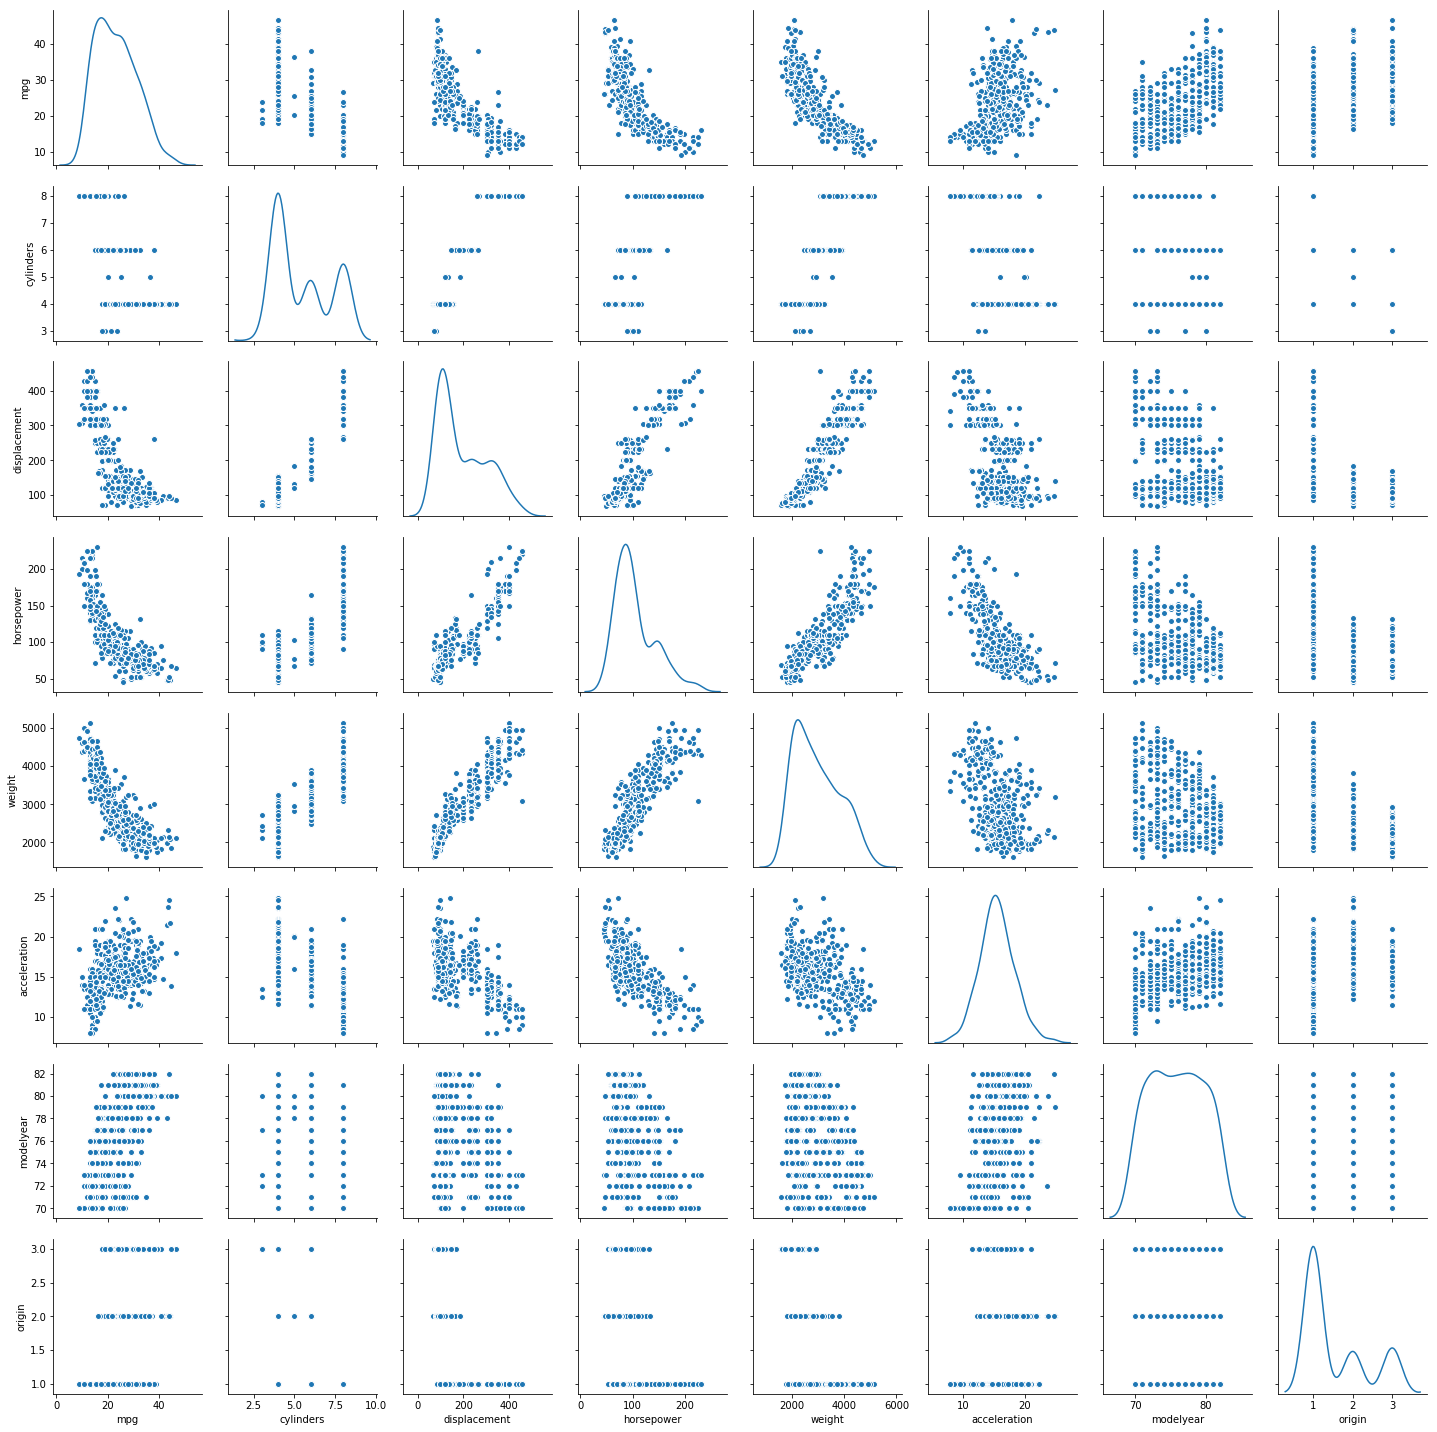

In [358]:
# Except Acceleration, Model year and origin the columns are correlated

sns.pairplot(pd_cars,diag_kind='kde')

In [359]:
#Observations

#mpg - positively correlated with origin and model year

#Cylinders correlated with displacement ,horse power and weight

#Accelertion is negatively correlated



# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [360]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age

if {'origin'}.issubset(pd_cars.columns):
    origin_d = pd.get_dummies(pd_cars['origin'],drop_first=True)
    #pd_cars = pd.concat([pd_cars,origin_d],axis=1)
    pd_cars['Europe']=origin[2.0]
    pd_cars['Japan']=origin[3.0]
    pd_cars.drop(['origin'],axis=1,inplace=True)

if {'modelyear'}.issubset(pd_cars.columns):
    pd_cars['veh_age'] = (83 - pd_cars.modelyear)
    pd_cars.drop(['modelyear'],axis=1,inplace=True)

if {'carname'}.issubset(pd_cars.columns):   
    pd_cars.drop(['carname'],axis=1,inplace=True)

#if {'acceleration'}.issubset(pd_cars.columns):   
 #   pd_cars.drop(['acceleration'],axis=1,inplace=True)
    
# Remove horsepower outliers
pd_cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,Europe,Japan,veh_age
0,18.0,8.0,307.0,130.0,3504.0,12.0,0,0,13.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,0,0,13.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,0,0,13.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,0,0,13.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,0,0,13.0
5,15.0,8.0,429.0,198.0,4341.0,10.0,0,0,13.0
6,14.0,8.0,454.0,220.0,4354.0,9.0,0,0,13.0
7,14.0,8.0,440.0,215.0,4312.0,8.5,0,0,13.0
8,14.0,8.0,455.0,225.0,4425.0,10.0,0,0,13.0
9,15.0,8.0,390.0,190.0,3850.0,8.5,0,0,13.0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

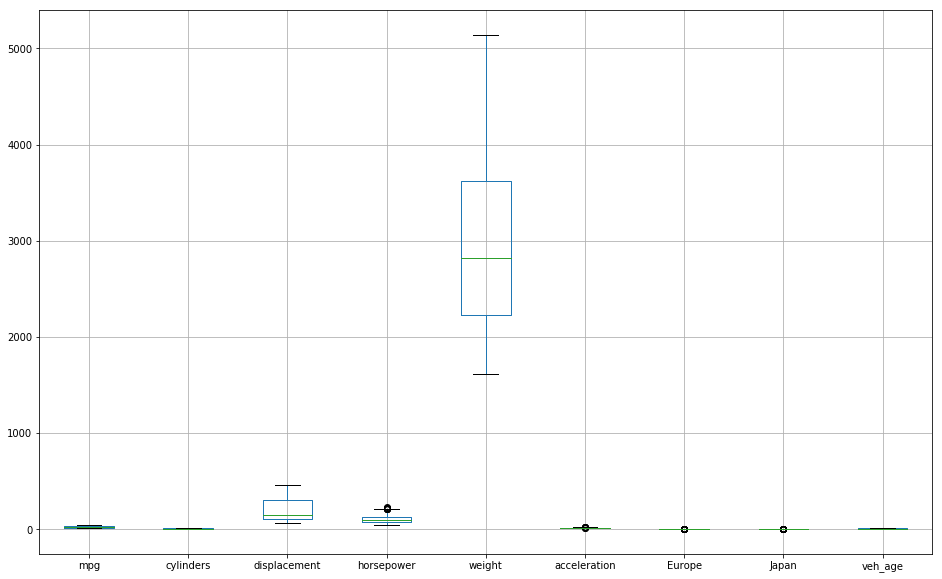

In [361]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now
plt.figure(figsize=(16, 10))
pd_cars.boxplot()

# Q7. Create appropriate clusters with the new data set

In [362]:
from scipy.stats import zscore

pd_cars_z = pd_cars.apply(zscore)

#scaler = MinMaxScaler()
#pd_cars_z = scaler.fit_transform(pd_cars)

cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 5
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 3,random_state=1)
  clusters.fit(pd_cars_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,1,3654.000000
1,2,2026.327975
2,3,1550.913255
3,4,1153.016553
4,5,953.449046
5,6,873.211890
6,7,798.528674
7,8,740.204472
8,9,664.801477


# Q8. Identify the appropriate clusters with result from above question

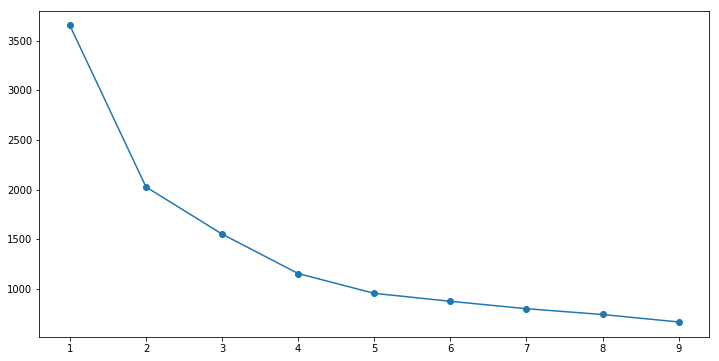

In [363]:
# identify appropriate cluster with elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Q9. Check for no of values in each cluster and centers for each variables. 

In [364]:
cluster = KMeans( n_clusters = 3, random_state = 1)
cluster.fit(pd_cars_z)
centroids = cluster.cluster_centers_
centroids

array([[ 0.90133787, -0.80354599, -0.87859449, -0.65270512, -0.89624265,
         0.23302492, -0.46820852,  2.03451235, -0.40646576],
       [-1.10867449,  1.45469071,  1.42474729,  1.41112125,  1.3226944 ,
        -1.00541823, -0.46820852, -0.49151827,  0.61451375],
       [ 0.22160344, -0.4275181 , -0.38567919, -0.4604447 , -0.32898551,
         0.41176347,  0.39979449, -0.49151827, -0.15642324]])

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [365]:
centroid_df = pd.DataFrame(centroids, columns = list(pd_cars_z))
centroid_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,Europe,Japan,veh_age
0,0.901338,-0.803546,-0.878594,-0.652705,-0.896243,0.233025,-0.468209,2.034512,-0.406466
1,-1.108674,1.454691,1.424747,1.411121,1.322694,-1.005418,-0.468209,-0.491518,0.614514
2,0.221603,-0.427518,-0.385679,-0.460445,-0.328986,0.411763,0.399794,-0.491518,-0.156423


In [370]:
prediction=cluster.predict(pd_cars_z)
pd_cars["GROUP"] = prediction 
pd_cars_z["GROUP"] = prediction
pd_cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,Europe,Japan,veh_age,GROUP
0,18.0,8.0,307.0,130.0,3504.0,12.0,0,0,13.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,0,0,13.0,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,0,0,13.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,0,0,13.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,0,0,13.0,1
5,15.0,8.0,429.0,198.0,4341.0,10.0,0,0,13.0,1
6,14.0,8.0,454.0,220.0,4354.0,9.0,0,0,13.0,1
7,14.0,8.0,440.0,215.0,4312.0,8.5,0,0,13.0,1
8,14.0,8.0,455.0,225.0,4425.0,10.0,0,0,13.0,1
9,15.0,8.0,390.0,190.0,3850.0,8.5,0,0,13.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ebd2febe0>,
      dtype=object)

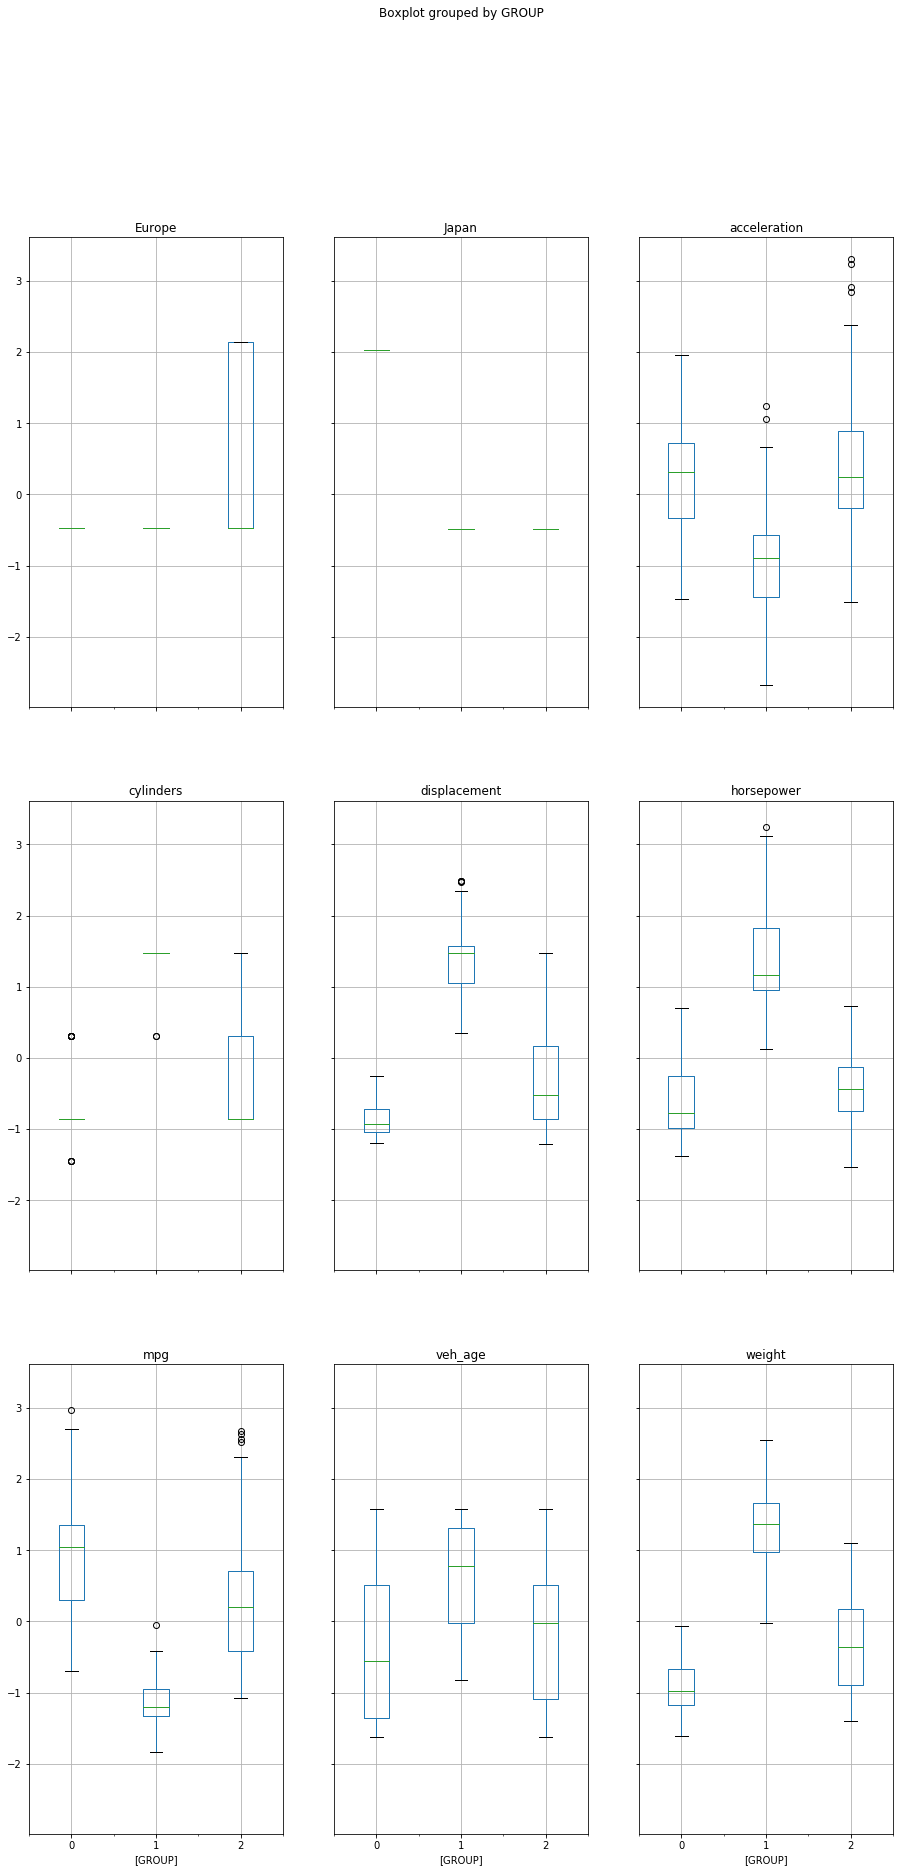

In [371]:
pd_cars_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

In [372]:

pd_cars.GROUP.value_counts()



2    219
1    108
0     79
Name: GROUP, dtype: int64

In [373]:
# Export the data into csv for any further analysis

Car_Groups = pd.DataFrame(pd_cars)

Car_Groups.to_csv("Car_Groups_KM.csv", index=False)

In [375]:
# We can try similar analysis for 5 grps as well to check if we get more clear distinction among groups

In [376]:
cluster = KMeans( n_clusters = 5, random_state = 1)
cluster.fit(pd_cars_z)
centroids = cluster.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(pd_cars_z))
prediction=cluster.predict(pd_cars_z)

if {'GROUP'}.issubset(pd_cars.columns):   
    pd_cars.drop(['GROUP'],axis=1,inplace=True)
    pd_cars["GROUP"] = prediction 

pd_cars.GROUP.value_counts() # No difference in the 


1    102
3     79
0     77
2     75
4     73
Name: GROUP, dtype: int64

In [377]:
Car_Groups = pd.DataFrame(pd_cars)

Car_Groups.to_csv("Car_Groups_KM_5.csv", index=False)

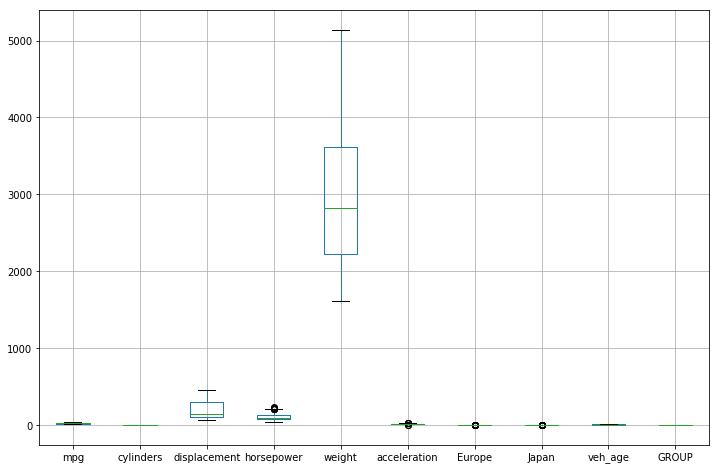

In [380]:
pd_cars.boxplot(figsize=(12, 8))